In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Three Datasets

In [2]:
movies_df = pd.read_csv(
    'movies.dat',
    sep='::',
    names=['MovieID','Title','Genres'],
    engine='python',
    header=None
    )

In [3]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_df.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [5]:
ratings_df = pd.read_csv(
    'ratings.dat',
    sep='::',
    names=['UserID','MovieID','Rating', 'Timestamp'],
    parse_dates=['Timestamp'],
    engine='python',
    header=None
)

In [6]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
ratings_df.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [8]:
users_df=pd.read_csv('users.dat',
        sep="::",
        names = ['UserID','Gender','Age', 'Occupation', 'zip-code'],
        engine='python',
        header=None
        )

In [9]:
users_df.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
users_df.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
zip-code      0
dtype: int64

# Merge
### Movies dataset and rating dataset

In [11]:
movies_ratings_df = pd.merge(movies_df,ratings_df, on='MovieID')
movies_ratings_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [12]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MovieID    1000209 non-null  int64 
 1   Title      1000209 non-null  object
 2   Genres     1000209 non-null  object
 3   UserID     1000209 non-null  int64 
 4   Rating     1000209 non-null  int64 
 5   Timestamp  1000209 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [13]:
movies_ratings_users_df = pd.merge(movies_ratings_df,users_df,on= 'UserID')
movies_ratings_users_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


## Creating Master dataset

In [14]:
Master_data = movies_ratings_users_df.drop(['Genres','Timestamp','zip-code'], axis=1)
Master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


In [15]:
Master_data.corr()

,MovieID,UserID,Rating,Age,Occupation
MovieID,1.000000,-0.017739,-0.064042,0.027575,0.008585
UserID,-0.017739,1.000000,0.012303,0.034688,-0.026698
Rating,-0.064042,0.012303,1.000000,0.056869,0.006753
Age,0.027575,0.034688,0.056869,1.000000,0.078371
Occupation,0.008585,-0.026698,0.006753,0.078371,1.000000


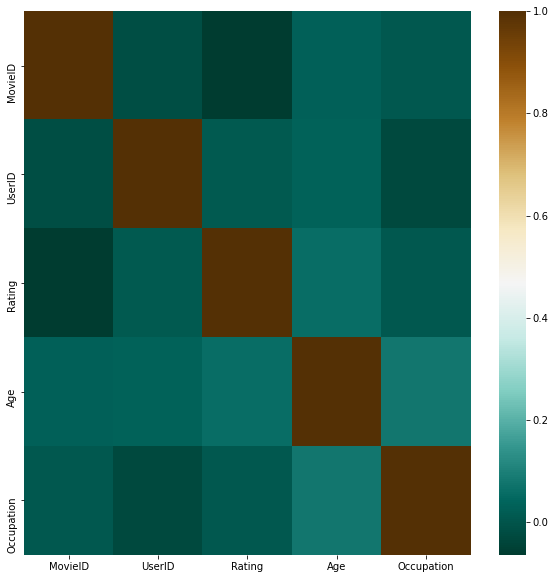

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data = Master_data.corr(), cmap='BrBG_r')
plt.show()

# EDA

### User Age Distribution

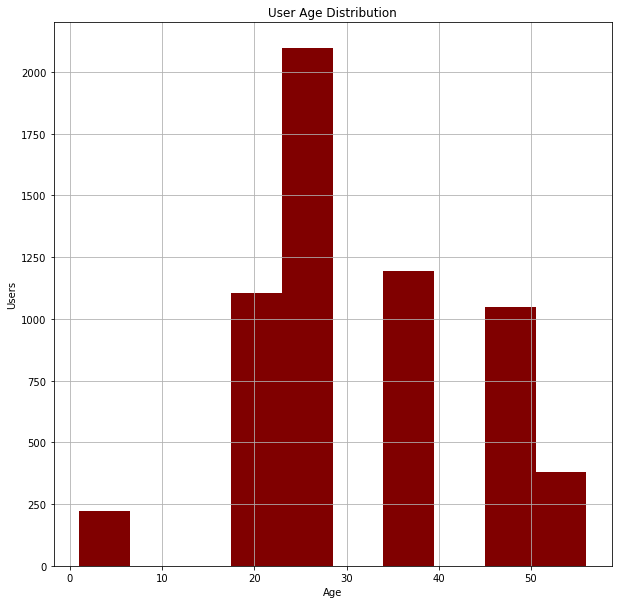

In [17]:
plt.figure(figsize=(10,10))
users_df.Age.hist(color='maroon')
plt.title("User Age Distribution")
plt.xlabel('Age')
plt.ylabel('Users')
plt.show()

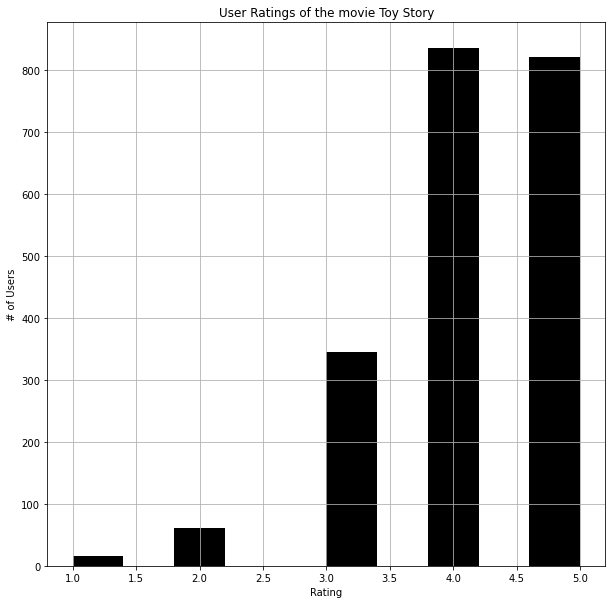

In [18]:
plt.figure(figsize=(10,10))
movies_grouped = movies_ratings_df.groupby('Title')
toy_story = movies_grouped.get_group('Toy Story (1995)')
toy_story['Rating'].hist(color = 'black')
plt.title('User Ratings of the movie Toy Story')
plt.xlabel('Rating')
plt.ylabel('# of Users')
plt.show()

## Top 25 movies by viewership ratings

In [19]:
movies_avg = movies_ratings_df.groupby('Title')['Rating'].mean()
movies_avg.head()

Title
$1,000,000 Duck (1971)           3.027027
'Night Mother (1986)             3.371429
'Til There Was You (1997)        2.692308
'burbs, The (1989)               2.910891
...And Justice for All (1979)    3.713568
Name: Rating, dtype: float64

In [20]:
movies_avg = movies_avg.sort_values(ascending=False)
movies_avg.head()

Title
Ulysses (Ulisse) (1954)     5.0
Lured (1947)                5.0
Follow the Bitch (1998)     5.0
Bittersweet Motel (2000)    5.0
Song of Freedom (1936)      5.0
Name: Rating, dtype: float64

### Number of ratings for the movies

In [21]:
rating_count = movies_ratings_df.groupby('Title')['Rating']
rating_count= rating_count.count().sort_values(ascending = False)
rating_count[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

### the ratings for all the movies reviewed by for a particular user of user id = 2696

In [22]:
rating_user = movies_ratings_users_df[movies_ratings_users_df['UserID']==2696]
rating_user

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


# Feature Engineering

### Finding out unique genres

In [23]:
movies_ratings_df['Genres'].value_counts().head()

Comedy            116883
Drama             111423
Comedy|Romance     42712
Comedy|Drama       42245
Drama|Romance      29170
Name: Genres, dtype: int64

In [24]:
movies_ratings_df['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

## Genre category with a one-hot encoding ( 1 and 0)

In [25]:
movie_ratings_selected_df = movies_ratings_users_df[[
    'Gender',
    'Age',
    'Occupation',
    'Rating',
    'Genres'
]]

In [26]:
Genre = movie_ratings_selected_df['Genres']
Genre = Genre.str.get_dummies().add_prefix('Genres_')
movie_ratings_genres_df = pd.concat(
    [movie_ratings_selected_df.drop(
        ['Genres'],
        axis=1
    ),
     Genre],
    axis=1,
   # join_axis=[movie_ratings_selected_df.index]
)
movie_ratings_genres_df.head()

,Gender,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,...,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western
0,F,1,10,5,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,5,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,1,10,4,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
movie_ratings_genres_df = pd.get_dummies(
    movie_ratings_genres_df,
    columns=['Gender']
)

In [28]:
movie_ratings_genres_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
0,1,10,5,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,5,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,10,4,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
movie_ratings_genres_df.columns

Index(['Age', 'Occupation', 'Rating', 'Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Children's', 'Genres_Comedy',
       'Genres_Crime', 'Genres_Documentary', 'Genres_Drama', 'Genres_Fantasy',
       'Genres_Film-Noir', 'Genres_Horror', 'Genres_Musical', 'Genres_Mystery',
       'Genres_Romance', 'Genres_Sci-Fi', 'Genres_Thriller', 'Genres_War',
       'Genres_Western', 'Gender_F', 'Gender_M'],
      dtype='object')

In [30]:
movie_ratings_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype
---  ------              --------------    -----
 0   Age                 1000209 non-null  int64
 1   Occupation          1000209 non-null  int64
 2   Rating              1000209 non-null  int64
 3   Genres_Action       1000209 non-null  int64
 4   Genres_Adventure    1000209 non-null  int64
 5   Genres_Animation    1000209 non-null  int64
 6   Genres_Children's   1000209 non-null  int64
 7   Genres_Comedy       1000209 non-null  int64
 8   Genres_Crime        1000209 non-null  int64
 9   Genres_Documentary  1000209 non-null  int64
 10  Genres_Drama        1000209 non-null  int64
 11  Genres_Fantasy      1000209 non-null  int64
 12  Genres_Film-Noir    1000209 non-null  int64
 13  Genres_Horror       1000209 non-null  int64
 14  Genres_Musical      1000209 non-null  int64
 15  Genres_Mystery      1000209 non-null  int64
 16  

## Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [32]:
movie_ratings_users_sample_df=movie_ratings_genres_df.sample(
    n=50000,
    random_state=0
)
movie_ratings_users_sample_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
324271,18,4,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
818637,18,4,3,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
148677,18,14,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
778790,50,7,4,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
525489,25,2,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:

x = movie_ratings_users_sample_df.drop('Rating', axis=1)
y = movie_ratings_users_sample_df['Rating']

In [34]:
x.shape

(50000, 22)

In [35]:
y.shape

(50000,)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5, stratify=y)

In [37]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 35.23


In [42]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
 

The Accuracy for Test Set is 34.99


## Gradient Booster Classifiers

In [43]:
 
import xgboost

In [44]:
movie_ratings_users_sample_df=movie_ratings_genres_df.sample(
    n=50000,
    random_state=0
)
movie_ratings_users_sample_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
324271,18,4,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
818637,18,4,3,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
148677,18,14,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
778790,50,7,4,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
525489,25,2,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [45]:
x = movie_ratings_users_sample_df.drop('Rating', axis=1)
y = movie_ratings_users_sample_df['Rating']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5, stratify=y)

In [47]:
xgb = xgboost.XGBClassifier(n_jobs=-1)
xgb.fit(X_train,y_train)

C:\Users\12AU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [48]:
y_pred_xgb = xgb.predict(X_test)

In [49]:
print('XGB accuracy score is : ', accuracy_score(y_test,y_pred_xgb )*100)

XGB accuracy score is :  34.74
